In [2]:
import pandas as pd

In [120]:
dataset = pd.read_csv('weather.csv', sep=';')

In [46]:
dataset

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,Yes,No
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,No,No
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,No,No
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,No,No


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 17 columns):
Month            14468 non-null int64
Location         14468 non-null object
MinTemp          14468 non-null float64
MaxTemp          14468 non-null float64
Rainfall         14468 non-null float64
WindGustSpeed    14468 non-null int64
WindSpeed9am     14468 non-null int64
WindSpeed3pm     14468 non-null int64
Humidity9am      14468 non-null int64
Humidity3pm      14468 non-null int64
Pressure9am      14468 non-null float64
Pressure3pm      14468 non-null float64
Cloud3pm         14468 non-null int64
Temp9am          14468 non-null float64
Temp3pm          14468 non-null float64
RainToday        14468 non-null object
RainTomorrow     14468 non-null object
dtypes: float64(7), int64(7), object(3)
memory usage: 1.9+ MB


In [15]:
dataset.isnull().values.any()

False

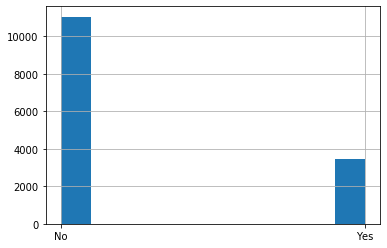

In [29]:
dataset.groupby('RainTomorrow').size()
dataset['RainTomorrow'].hist()

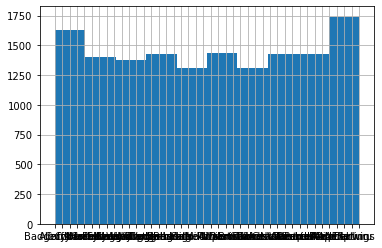

In [57]:
dataset.groupby('Location').size()
dataset['Location'].hist()

In [68]:
dataset['Location'].nunique()

42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bce0e6350>,
      dtype=object)

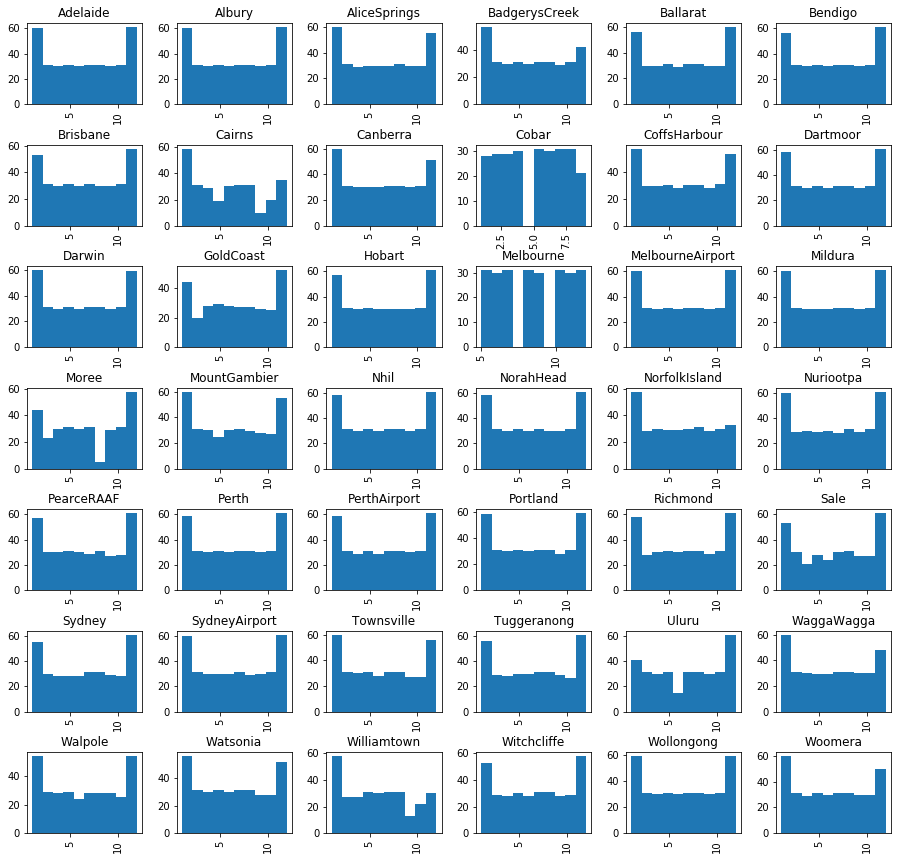

In [79]:
dataset['Month'].hist(by=dataset['Location'], figsize=(15,15))

In [121]:
dataset[['Humidity9am', 'Humidity3pm']].groupby([dataset['Location'], dataset['Month']]).max()

Humidity9am  Humidity3pm
Location Month                          
Adelaide 1               86           93
         2               73           76
         3               93           65
         4               84           58
         5               93           92
...                     ...          ...
Woomera  8               92           78
         9               95           84
         10              92           62
         11              76           46
         12              81           57

[497 rows x 2 columns]

In [90]:
dataset[['Humidity9am', 'Humidity3pm']].groupby([dataset['Location'], dataset['Month']]).min()

Humidity9am  Humidity3pm
Location Month                          
Adelaide 1               14           11
         2               30           13
         3               36           19
         4               24           15
         5               36           32
...                     ...          ...
Woomera  8               28           13
         9               24           15
         10              10            4
         11               6            3
         12              15            7

[497 rows x 2 columns]

In [122]:
dataset['TemperatureRange'] = dataset['MaxTemp'] - dataset['MinTemp']

In [123]:
dataset.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No,17.2
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes,12.7
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes,4.7
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes,6.4
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No,7.4


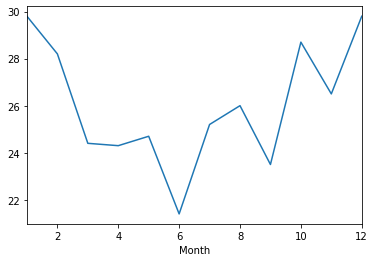

In [124]:
dataset['TemperatureRange'].groupby(dataset['Month']).max().plot()

In [125]:
df = dataset.copy()

In [135]:
dataset.loc[dataset['RainToday'] == 'No', 'RainToday'] = 0
dataset.loc[dataset['RainToday'] == 'Yes', 'RainToday'] = 1
dataset.loc[dataset['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
dataset.loc[dataset['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1

In [136]:
dataset

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,0,13.7
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,0,14.2
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,0,14.8
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,0,17.3


In [137]:
reduce = dataset.loc[dataset['Cloud3pm'] >= 0]

In [138]:
reduce

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,12,Uluru,24.8,32.6,0.0,44,20,11,59,57,1007.5,1004.0,8,28.2,30.0,0,1,7.8
14460,12,Uluru,22.9,29.9,21.8,35,13,19,85,58,1008.8,1005.1,6,24.6,29.3,1,1,7.0
14461,12,Uluru,22.8,29.5,9.2,54,19,26,96,75,1005.5,1001.1,8,24.3,28.0,1,1,6.7
14462,12,Uluru,22.1,27.4,83.8,72,31,43,100,100,994.6,989.2,8,22.2,24.2,1,1,5.3


In [140]:
from sklearn.model_selection import train_test_split

In [179]:
X = dataset.loc[:, (dataset.columns != 'RainTomorrow') & (dataset.columns != 'Location')]

In [143]:
y = dataset.loc[:, 'RainTomorrow']

In [180]:
X

,Month,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,TemperatureRange
0,1,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,17.2
1,1,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,12.7
2,1,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,4.7
3,1,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,6.4
4,1,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,13.7
14464,12,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,14.2
14465,12,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,14.8
14466,12,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,17.3


In [145]:
y

0        0
1        1
2        1
3        1
4        0
        ..
14463    0
14464    0
14465    0
14466    0
14467    0
Name: RainTomorrow, Length: 14468, dtype: int64

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [182]:
y_train

12183    0
5848     1
10700    0
10686    0
13504    0
        ..
13002    0
4536     0
6257     0
11843    0
787      0
Name: RainTomorrow, Length: 11574, dtype: int64

In [282]:
from sklearn.preprocessing import StandardScaler

In [283]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [299]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [150]:
model_lr = LogisticRegression()

In [290]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
lr_y_pred = model_lr.predict(X_test)

In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [292]:
confusion_matrix(y_test, lr_y_pred)

array([[2081,  124],
       [ 332,  357]])

In [293]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2205
           1       0.74      0.52      0.61       689

    accuracy                           0.84      2894
   macro avg       0.80      0.73      0.76      2894
weighted avg       0.83      0.84      0.83      2894



In [214]:
model_dt = DecisionTreeClassifier()

In [294]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [295]:
dt_y_pred = model_dt.predict(X_test)

In [296]:
confusion_matrix(y_test, dt_y_pred)

array([[1902,  303],
       [ 318,  371]])

In [297]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2205
           1       0.55      0.54      0.54       689

    accuracy                           0.79      2894
   macro avg       0.70      0.70      0.70      2894
weighted avg       0.78      0.79      0.78      2894



In [225]:
lr_accuracy = (lr_y_pred.size - np.count_nonzero(lr_y_pred - y_test)) / lr_y_pred.size

In [226]:
lr_accuracy

0.8369039391845197

In [228]:
dt_accuracy = (dt_y_pred.size - np.count_nonzero(dt_y_pred - y_test)) / dt_y_pred.size

In [229]:
dt_accuracy

0.7840359364201797

In [230]:
from sklearn.model_selection import KFold

In [231]:
kf = KFold(n_splits=5)

In [304]:
from sklearn.model_selection import cross_val_score

In [306]:
scaler.fit(X)
X = scaler.transform(X)

-7.511086951005649e-15

In [309]:
data = X

In [302]:
target = y

In [310]:
results_lr = cross_val_score(model_lr, data, target, cv=kf)

In [311]:
results_lr.mean()

0.8387482260041456

In [312]:
results_dt = cross_val_score(model_dt, data, target, cv=kf)

In [313]:
results_dt.mean()

0.7588483604707023

In [248]:
from sklearn.model_selection import StratifiedKFold

In [249]:
skf = StratifiedKFold(n_splits=5)

In [314]:
results_lr_skf = cross_val_score(model_lr, data, target, cv=skf)

In [315]:
results_lr_skf.mean()

0.838747700464219

In [316]:
results_dt_skf = cross_val_score(model_dt, data, target, cv=skf)

In [317]:
results_dt_skf.mean()

0.7637558761933041

In [255]:
dataset.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4


In [318]:
dataset['MeanTemp'] = (dataset['MaxTemp'] + dataset['MinTemp']) / 2

In [319]:
df = dataset.copy(deep=True)

In [320]:
df = df.drop(columns=['MinTemp', 'MaxTemp'])

In [321]:
df

,Month,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange,MeanTemp
0,1,Albury,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2,29.00
1,1,Albury,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7,27.25
2,1,Albury,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7,20.75
3,1,Albury,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4,20.50
4,1,Albury,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4,19.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,0,13.7,28.95
14464,12,Uluru,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,0,14.2,29.70
14465,12,Uluru,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,0,14.8,30.60
14466,12,Uluru,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,0,17.3,28.35


In [322]:
df['MeanWind'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2

In [323]:
df = df.drop(columns=['WindSpeed9am', 'WindSpeed3pm'])

In [324]:
df

,Month,Location,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange,MeanTemp,MeanWind
0,1,Albury,0.0,54,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2,29.00,3.5
1,1,Albury,0.4,50,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7,27.25,13.0
2,1,Albury,2.2,48,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7,20.75,25.0
3,1,Albury,15.6,39,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4,20.50,13.0
4,1,Albury,6.8,31,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4,19.20,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,63.8,43,77,41,997.8,995.2,2,26.0,33.5,1,0,13.7,28.95,24.0
14464,12,Uluru,0.0,50,63,39,1000.0,998.8,-1,29.7,34.0,0,0,14.2,29.70,22.5
14465,12,Uluru,0.0,33,25,14,1004.4,1001.0,-1,28.7,36.4,0,0,14.8,30.60,17.0
14466,12,Uluru,0.0,37,30,23,1004.6,1000.9,-1,28.2,35.1,0,0,17.3,28.35,14.0


In [325]:
data = df.loc[:, (df.columns != 'RainTomorrow') & (df.columns != 'Location')]

In [326]:
target = df.loc[:, 'RainTomorrow']

In [327]:
scaler.fit(data)
data = scaler.transform(data)

In [328]:
results_lr = cross_val_score(model_lr, data, target, cv=kf)
results_dt = cross_val_score(model_dt, data, target, cv=kf)

In [329]:
results_lr.mean()

0.8381260583956077

In [330]:
results_dt.mean()

0.7597466037579449

In [332]:
dataset

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange,MeanTemp
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2,29.00
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7,27.25
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7,20.75
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4,20.50
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4,19.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,0,13.7,28.95
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,0,14.2,29.70
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,0,14.8,30.60
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,0,17.3,28.35


In [335]:
cloudP = dataset.loc[dataset['Cloud3pm'] < 0]
cloudP

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange,MeanTemp
9,1,Albury,17.8,37.0,0.0,41,9,17,54,17,1016.6,1012.6,-1,26.2,36.2,0,0,19.2,27.40
11,1,Albury,20.6,38.9,0.0,56,6,24,40,18,1010.8,1009.8,-1,28.1,37.6,0,0,18.3,29.75
12,1,Albury,20.2,43.0,0.0,72,15,24,51,16,1013.8,1007.5,-1,27.9,42.3,0,0,22.8,31.60
14,1,Albury,10.4,25.2,0.0,46,19,20,41,31,1026.1,1023.8,-1,15.9,23.9,0,0,14.8,17.80
15,1,Albury,10.7,29.4,0.0,35,13,9,45,19,1027.4,1022.9,-1,17.8,27.3,0,0,18.7,20.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14457,12,Uluru,26.1,38.2,0.0,50,26,26,32,19,1010.3,1006.4,-1,29.1,37.1,0,0,12.1,32.15
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,0,14.2,29.70
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,0,14.8,30.60
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,0,17.3,28.35


In [337]:
cloudT = dataset.loc[dataset['Cloud3pm'] >= 0]
cloudT

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange,MeanTemp
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,0,17.2,29.00
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,1,12.7,27.25
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,1,4.7,20.75
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,1,6.4,20.50
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,0,7.4,19.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,12,Uluru,24.8,32.6,0.0,44,20,11,59,57,1007.5,1004.0,8,28.2,30.0,0,1,7.8,28.70
14460,12,Uluru,22.9,29.9,21.8,35,13,19,85,58,1008.8,1005.1,6,24.6,29.3,1,1,7.0,26.40
14461,12,Uluru,22.8,29.5,9.2,54,19,26,96,75,1005.5,1001.1,8,24.3,28.0,1,1,6.7,26.15
14462,12,Uluru,22.1,27.4,83.8,72,31,43,100,100,994.6,989.2,8,22.2,24.2,1,1,5.3,24.75


In [388]:
data = cloudT.loc[:, (cloudT.columns != 'Cloud3pm') & (cloudT.columns != 'Location')]
target = cloudT.loc[:, cloudT.columns == 'Cloud3pm']
scaler.fit(data)
data = scaler.transform(data)

In [389]:
model = LogisticRegression()

In [390]:
target.values.ravel()

array([3, 8, 8, ..., 8, 8, 2])

In [415]:
model.fit(data, target)

/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [392]:
cloudp_data = cloudP.loc[:, (cloudP.columns != 'Cloud3pm') & (cloudP.columns != 'Location')]
cloudp_target = cloudP.loc[:, cloudP.columns == 'Cloud3pm']
cloudp_data = scaler.transform(cloudp_data)

In [417]:
cloudp_pred = model.predict(cloudp_data)

In [396]:
cloudp_pred

8

In [413]:
from sklearn.metrics import accuracy_score

In [419]:
accuracy_score(cloudp_target, cloudp_pred)

0.0

In [423]:
cloudPT = pd.concat([cloudP, cloudT])
cloudPT

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TemperatureRange,MeanTemp
9,1,Albury,17.8,37.0,0.0,41,9,17,54,17,1016.6,1012.6,-1,26.2,36.2,0,0,19.2,27.40
11,1,Albury,20.6,38.9,0.0,56,6,24,40,18,1010.8,1009.8,-1,28.1,37.6,0,0,18.3,29.75
12,1,Albury,20.2,43.0,0.0,72,15,24,51,16,1013.8,1007.5,-1,27.9,42.3,0,0,22.8,31.60
14,1,Albury,10.4,25.2,0.0,46,19,20,41,31,1026.1,1023.8,-1,15.9,23.9,0,0,14.8,17.80
15,1,Albury,10.7,29.4,0.0,35,13,9,45,19,1027.4,1022.9,-1,17.8,27.3,0,0,18.7,20.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,12,Uluru,24.8,32.6,0.0,44,20,11,59,57,1007.5,1004.0,8,28.2,30.0,0,1,7.8,28.70
14460,12,Uluru,22.9,29.9,21.8,35,13,19,85,58,1008.8,1005.1,6,24.6,29.3,1,1,7.0,26.40
14461,12,Uluru,22.8,29.5,9.2,54,19,26,96,75,1005.5,1001.1,8,24.3,28.0,1,1,6.7,26.15
14462,12,Uluru,22.1,27.4,83.8,72,31,43,100,100,994.6,989.2,8,22.2,24.2,1,1,5.3,24.75


In [426]:
kf = KFold(n_splits=10)

In [450]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()

In [480]:
data = cloudPT.loc[:, (cloudPT.columns != 'RainTomorrow') & (cloudPT.columns != 'Location')]
target = cloudPT.loc[:, cloudPT.columns == 'RainTomorrow'].values
scaler.fit(data)
data = scaler.transform(data)

In [461]:
data.shape

(14468, 17)

In [462]:
target.shape

(14468, 1)

In [463]:
results_lr = cross_val_score(model_lr, data, target.ravel(), cv=kf)
results_dt = cross_val_score(model_dt, data, target.ravel(), cv=kf)

In [465]:
results_lr.mean()

0.8379844883437952

In [464]:
results_dt.mean()

0.7681070961908121

In [474]:
X = dataset.loc[:, (dataset.columns != 'Location') & (dataset.columns != 'RainTomorrow')]
y = dataset.loc[:, dataset.columns == 'RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [478]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)

In [481]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2221
           1       0.76      0.52      0.62       673

    accuracy                           0.85      2894
   macro avg       0.81      0.74      0.76      2894
weighted avg       0.84      0.85      0.84      2894

